File name needs to be updated

In [1]:
import pandas as pd
from IPython.display import display
import re
from datetime import datetime
import matplotlib.pyplot as plt
# read file ##update file path and name
df = pd.read_csv('C:/Users/yali.li/Documents/LIMS_Query/G0155_Revenue/01-07_G0155.csv',sep = ',', header = None, encoding = 'unicode_escape') 
#add header 
df.columns = ['WO#', 'Company', 'Customer', 'Quantity', 'Unit_Price', 'Discount', 'Revenue', 'Time', 'Priority', 'Item_Code', 'Billing_Desc', 'Invoice_Data', 'Data_Created', 'Territory', 'Location','Lab', 'Salesperson']


In [2]:
#extract month from Invoice_Data column
Month=[datetime.strptime(i, '%m/%d/%Y %H:%M').month for i in df['Invoice_Data']]
#add a column 'Month' to the df
df['Month']=Month

In [38]:
#generate a monthly summary table based on revenue
df_monthly=df.groupby(['Month']).sum()[['Quantity', 'Revenue']]
df_monthly

,Quantity,Revenue
Month,,
1,16,10075.0
2,18,8060.0
3,22,13702.0
4,17,9672.0
5,12,6448.0
6,23,16724.5
7,16,17732.0


In [4]:
#annual total revenue
Revenue_2022 = df_monthly['Revenue'].sum()
Revenue_2022

82413.5

In [5]:
#annual total # of samples
Samples_2022 = df_monthly['Quantity'].sum()
Samples_2022

124

In [6]:
# # of samples per month
Samples_per_month_2022 = df_monthly['Quantity'].mean()
Samples_per_month_2022

17.714285714285715

calculate # of priority and sameday samples per month

In [48]:
df_priority = df[df['Billing_Desc'].str.match("Priority", flags=re.IGNORECASE)].fillna(0)
df_sameday = df[df['Billing_Desc'].str.match("SAME", flags=re.IGNORECASE)].fillna(0)
df_priority=df_priority.groupby(['Month']).sum()[['Quantity']]
df_priority.columns=['Priority_Quantity']
df_sameday=df_sameday.groupby(['Month']).sum()[['Quantity']]
df_sameday.columns=['SameDay_Quantity']
dfs=[df_monthly, df_priority, df_sameday]
df_summary=pd.concat(dfs, axis=1).fillna(0).astype('int64')
df_summary['Total_Priority'] = df_summary.loc[:,['Priority_Quantity','SameDay_Quantity']].sum(axis=1)
df_summary


,Quantity,Revenue,Priority_Quantity,SameDay_Quantity,Total_Priority
Month,,,,,
1,16,10075,10,1,11
2,18,8060,0,1,1
3,22,13702,0,6,6
4,17,9672,3,2,5
5,12,6448,4,0,4
6,23,16724,3,8,11
7,16,17732,0,14,14


Further dig into the data, monthly revenue, monthly # of samples, priority samples.

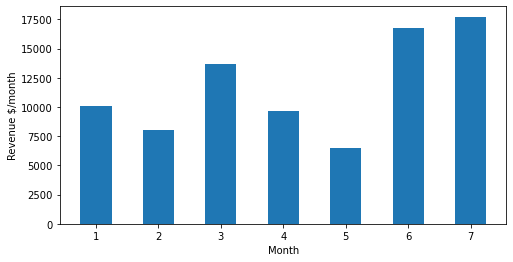

In [49]:
plt.figure(figsize = (8,4))
plt.bar(df_monthly.index.values, df_monthly['Revenue'],  width=0.5)
plt.xticks(df_monthly.index.values)
plt.xlabel('Month')
plt.ylabel('Revenue $/month')
plt.show()

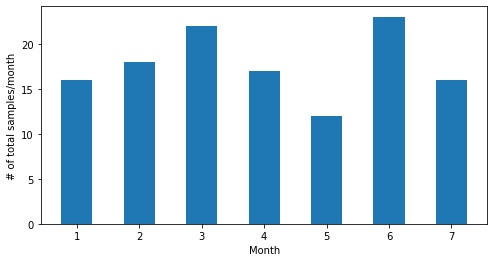

In [50]:
plt.figure(figsize = (8,4))
plt.bar(df_monthly.index.values, df_monthly['Quantity'],  width=0.5)
plt.xticks(df_monthly.index.values)
plt.xlabel('Month')
plt.ylabel('# of total samples/month')
plt.show()

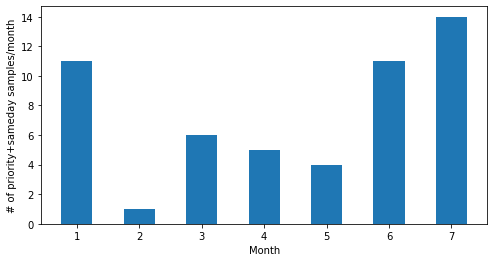

In [51]:
plt.figure(figsize = (8,4))
plt.bar(df_priority_sameday.index.values, df_priority_sameday['Total_Priority'],  width=0.5)
plt.xticks(df_summary.index.values)
plt.xlabel('Month')
plt.ylabel('# of priority+sameday samples/month')
plt.show()